# Introduksjon til Jupyter Notebook og `numpy`

## Grunnleggende om Jupyter

Jupyter (fra __Ju__lia, __Pyt__hon, __R__) er programvare som gjør det lett å kombinere kode med forklaringer og bilder.

![Bildetekst (vises vis bildet ikke finnes eller om du holder musepekeren over)](./valp.jpg)

Notatbøkene er organisert i _celler_. Det finnes to typer celler: Markdown- og kode-celler. Markdown brukes til å skrive fritekst, tabeller, matematiske formler, og til å sette inn bilder. GitHub har en fin guide til syntaks [her](https://guides.github.com/features/mastering-markdown/). 
Om du er kjent med HTML og CSS kan du også bruke dette i notatboken, f.eks. for å <span style="color: red;">farge tekst</span>.

Kodeceller ser ut som følger:

In [2]:
def say_hello():
    print("Hello!")

say_hello()

Hello!


Globale variabler definert i en tidligere kjørt kodecelle vil være tilgjengelig for andre kodeceller i notatboken. Vi kan dermed bruke funksjonen definert over flere ganger:

In [3]:
say_hello()

Hello!


Vær oppmerksom på at dersom du redefinerer en global variabel vil den endres overalt, også i celler lenger opp i notatboken dersom de kjøres ute av rekkefølge:

In [4]:
def say_hello():
    print("Hi!")

Legg derfor merke til `In [tall]:` ved siden av notatboken. Det siste som returneres av kodecellen vil også printes under cellen:

In [5]:
x = 2
y = 3
x + y

5

In [6]:
x * y

6

## `numpy` og andre Python-biblioteker

Som andre kodespråk er det flere bibliotek tilgjengelig i Python. En del er forhåndsinstallert, f.eks. `os` og `math`:

In [7]:
import os

os.getcwd()

'/Users/erik/ntnu/TMA4320/demo'

In [8]:
import math

math.sqrt(2)

1.4142135623730951

Legg merke til at for å bruke en funksjon fra et importert bibliotek så må jeg bruke syntaksen `bibliotek.funksjon()`. Om du vet på forhånd hvilken funksjon du vil bruke, kan du hente bare denne:

In [9]:
from math import cos

cos(0)

1.0

Det er også en mulighet å gi en pakke et alias dersom du ikke gidder å skrive hele navnet hver gang

In [10]:
import random as rand

rand.randint(1, 10)

3

Når du installerte Anaconda installerte du også mange pakker til Python. To av dem er `numpy` og `matplotlib`, dine nye bestevenner i TMA4320. `numpy` er et bibliotek som implementerer sin egen versjon av Pythons lister og mange standard matematiske funksjoner. Før vi ser på numpy skal vi raskt motivere hvorfor vi ikke bare bruker vanlig Python.

En liste i Python kan representere en vektor, f.eks. $x = [1, 2, 3]^T$. Om vi ønsker å regne ut $2x$ er det fort gjort å anta at vi kan gjøre det på denne måten:

In [11]:
x = [1, 2, 3]
2 * x

[1, 2, 3, 1, 2, 3]

... men da får vi åpenbart ikke svaret vi forventer. Det viser seg at vi må gjøre det på denne måten:

In [12]:
ans = []
for xi in x:
    ans.append(2 * xi)
ans

[2, 4, 6]

Vi kan eventuelt bruke noe som heter for _list comprehensions_. Dette er en metode i Python for å lage lister av eksisterende _iterables_ – objekter du kan iterere over. Syntaksen er
```py
[expression for value in iterable if logical_expression]
```
hvor `logical_expression` er valgfritt.
Dette tilsvarer koden
```py
new_list = []
for value in iterable:
    if logical_expression;
        new_list.append(value)
```
Dermed blir en list comprehension for $2x$ følgende:

In [13]:
[2*xi for xi in x]

[2, 4, 6]

Ingen av delene er spesielt pent. Å legge sammen to vektorer er også tungvint. Dette blir feil:

In [14]:
y = [4, 5, 6]
x + y

[1, 2, 3, 4, 5, 6]

Så vi blir nødt til å gjøre

In [15]:
ans = [None] * 3
for i in range(len(x)):
    ans[i] = x[i] + y[i]
ans

[5, 7, 9]

eller

In [16]:
[xi + yi for xi, yi in zip(x, y)]

[5, 7, 9]

Tilsvarende med indreproduktet:

In [17]:
x * y

TypeError: can't multiply sequence by non-int of type 'list'

In [18]:
sum(xi * yi for xi, yi in zip(x, y))

32

## `numpy`

`numpy` løser alle disse problemene for oss, og gir oss metoder som er raskere enn vi greier å skrive selv i Python.

In [19]:
import numpy as np # dette er standard alias for numpy, og dere vil se det overalt

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

x + y

array([5, 7, 9])

In [20]:
2 * x

array([2, 4, 6])

In [21]:
np.dot(x, y)

32

In [22]:
x.dot(y)

32

In [23]:
x @ y

32

## Matriser

`numpy` har også støtte for matriser, inkludert matrise-produkt, matrise-vektor-produkt, og å løse lineære systemer.

In [24]:
A = np.array([
    [0, 1],
    [2, 3]
])
b = np.array([1, 1])

In [25]:
A @ b

array([1, 5])

In [26]:
A @ A

array([[ 2,  3],
       [ 6, 11]])

In [27]:
np.linalg.solve(A, b)

array([-1.,  1.])

Du kan indeksere matriser med syntaksen `A[rad_indeks, kolonne_indeks]`. På samme måte som lister og andre arrays støtter dette også _slicing_, `[i:j]`.

In [32]:
A[:, 0] # Første kolonne

array([0, 2])

Du finner også mange standard matematiske funksjoner i numpy.

In [33]:
np.cos(x)

array([ 0.54030231, -0.41614684, -0.9899925 ])

In [34]:
np.sqrt(x)

array([1.        , 1.41421356, 1.73205081])

In [35]:
np.exp(x)

array([ 2.71828183,  7.3890561 , 20.08553692])

Vi kan også definere egne funksjoner og gi den et `numpy`-array som argument:

In [36]:
def f(x):
    return 2 + x

In [37]:
f(x)

array([3, 4, 5])

## Vanlige feller i `numpy`
Om dere har funksjoner som er definert stykkevis, f.eks.
$$
f(x) =
\begin{cases}
1, \quad &0 \leq x \leq 1, \\
0 &\text{ellers},
\end{cases}
$$
må dere passe litt på når dere sender et array gjennom den.

In [38]:
def piecewise_func(x):
    if 0 <= x <= 1:
        return 1
    return 0

In [39]:
piecewise_func(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

For å få dette til å virke må dere enten bruke en `for`-løkke, eller kanskje aller enklest, en list comprehension.

In [40]:
[piecewise_func(xi) for xi in x]

[1, 0, 0]

En annen vanlig feil er å bruke streng likhet når man skal se om to tall er like. På grunn av numeriske unøyaktigheter vil dette ofte gi feil svar:

In [41]:
np.sin(np.pi) == 0

False

In [42]:
0.1 + 0.2 == 0.3

False

Et bedre alternativ er å bruke `np.isclose()`. Standardparameterne er passelig for verdier av størrelsesorden $10^0$ – for andre verdier, se [dokumentasjonen](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html).

In [43]:
np.isclose(np.sin(np.pi), 0)

True

In [44]:
np.isclose(0.1 + 0.2, 0.3)

True

Et annet enkelt alternativ er å sjekke at absoluttverdien av differansen er mindre enn en gitt toleranse (som uansett er sånn ca. det `isclose()` gjør)

In [45]:
abs(np.sin(np.pi)) < 1e-10

True

In [46]:
abs((0.1 + 0.2) - 0.3) < 1e-10

True

## Plotting med `matplotlib`

For å plotte i Python kan vi bruke biblioteket matplotlib, og spesifikt modulen pyplot. Et vanlig alias for denne er `plt`.

In [47]:
import matplotlib.pyplot as plt # eventuelt from matplotlib import pyplot as plt

Hvis du f.eks. vil plotte en rekker verdier og ha listeindeksen langs $x$-aksen kan du kalle `plt.plot()` med en liste eller et numpy-array som argument.

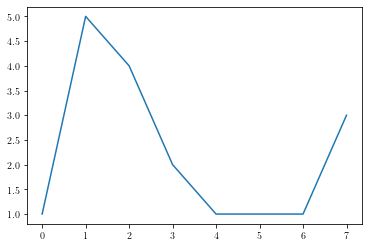

In [48]:
y = np.array([1, 5, 4, 2, 1, 1, 1, 3])

plt.plot(y)

Om du vil endre hvordan figuren din ser ut, f.eks. oppløsningen på skjermen, kan du først sende innstillinger til figuren ved hjelp av `plt.figure()`:

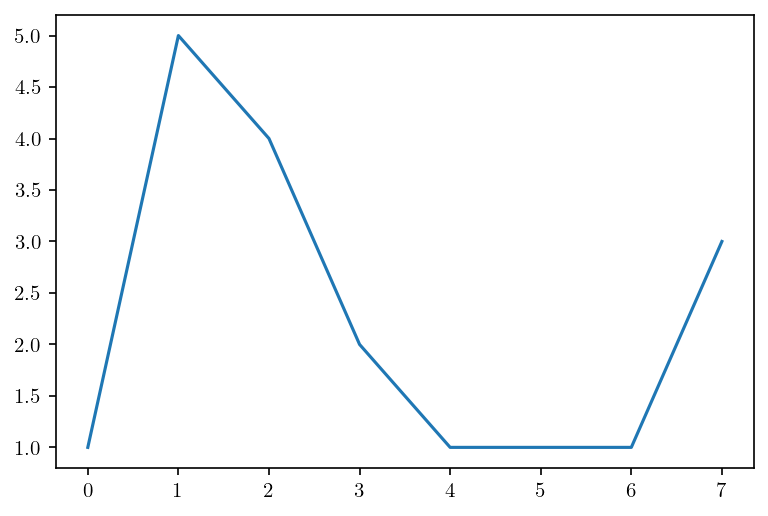

In [49]:
plt.figure(dpi=150) # dots per inch
plt.plot(y)

Det er også mulig å bruke en objektorientert fremgangsmåte. Bruk den du er mest komfortabel med.

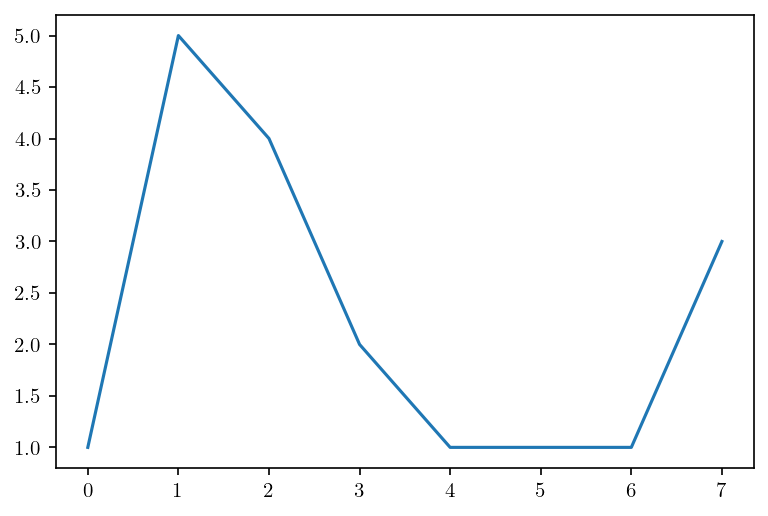

In [50]:
fig, ax = plt.subplots(dpi=150)
ax.plot(y)

Om du vil plotte en funksjon hvor argumentet til funksjonen er langs $x$-aksen kan du gi `plt.plot()` to argumenter. Her er ofte funksjonen `np.linspace(start, end, num=50)` nyttig. Den lager et array som består av punkter jevnt spredd mellom start og end:

In [51]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Det betyr at dersom jeg vil plotte $\sin{x}$ fra $x=0$ til $x=2 \pi$ kan jeg gjøre det ved

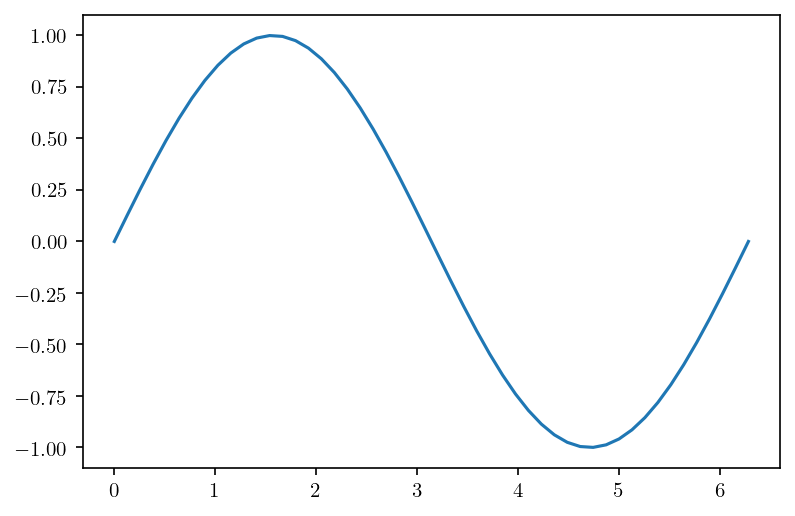

In [52]:
x = np.linspace(0, 2*np.pi)
plt.figure(dpi=150)
plt.plot(x, np.sin(x))
plt.show()

Vi kan også skru på et rutenett, gi aksene titler, og plotte sinus og cosinus i samme plott:

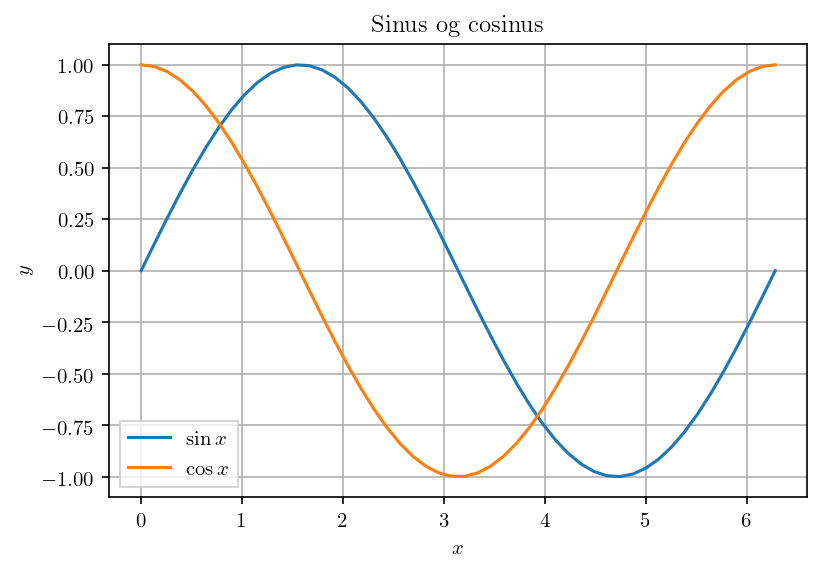

In [53]:
plt.figure(dpi=150)
plt.plot(x, np.sin(x), label=r'$\sin x$')
plt.plot(x, np.cos(x), label=r'$\cos x$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Sinus og cosinus')
plt.legend()
plt.grid()
plt.show()

Om du i stedet vil lagre figuren kan du bruke `savefig()`, som tar filnavnet figuren skal lagres med som argument. Filendelsen bestemmer formatet plottet lagres i. Vi anbefaler på det sterkeste å bruke `.pdf` for alle figurer som skal inkluderes i en rapport. Om du vil bruke plottet på en nettside eller i en Powerpoint kan du bruke `.png` som filendelse.

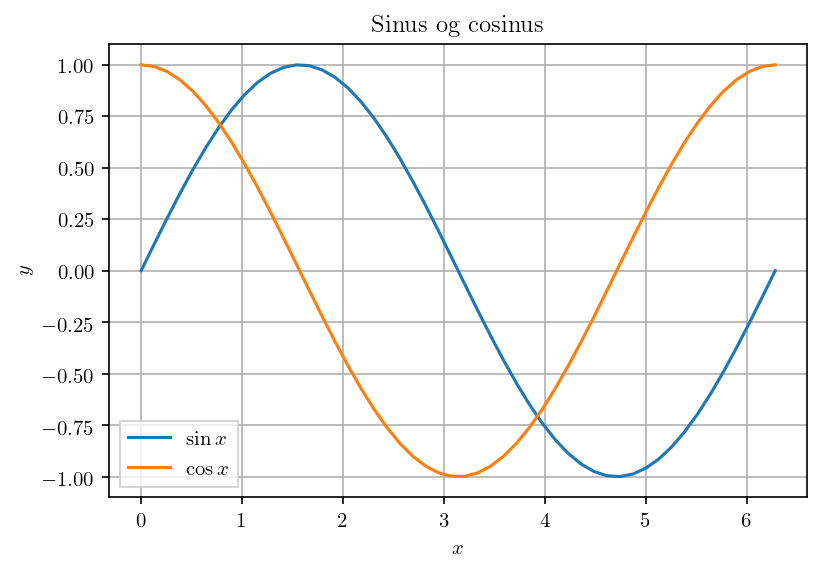

In [54]:
plt.figure(dpi=150)
plt.plot(x, np.sin(x), label=r'$\sin x$')
plt.plot(x, np.cos(x), label=r'$\cos x$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Sinus og cosinus')
plt.legend()
plt.grid()
plt.savefig("min_figur.pdf")

Det kan tenkes at mitt plott ser annerledes ut enn det dere får når om dere forsøker å kjøre notatboken.
Det er fordi jeg har endret innstillingene i min installasjon av matplotlib.
Les mer om dette [her](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html).
For å få til noe lignende i denne notatboken, kan dere forsøke å kjøre denne kodesnutten og deretter lage plottene på nytt:

In [ ]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})